In [1]:
#install packages
pip install pandas numpy scikit-learn seaborn matplotlib


In [13]:
!pip install --upgrade scikit-learn

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report


In [4]:
#load the dataset

data = pd.read_csv('/content/student-mat.csv', sep=';')
print(data.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [5]:
#data preporcessing

# Check missing data
print(data.isnull().sum())

# If needed, fill or drop missing data (this dataset has no missing values usually)


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [6]:
# Label Encoding for binary categories, One-Hot for multi-categories

# Label encoding for binary columns
binary_cols = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup',
               'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

le = LabelEncoder()
for col in binary_cols:
    data[col] = le.fit_transform(data[col])

# One-hot encoding for nominal categorical columns
data = pd.get_dummies(data, columns=['school', 'Mjob', 'Fjob', 'reason', 'guardian'], drop_first=True)


In [7]:
#feature scaling
scaler = StandardScaler()
numerical_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
                  'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [8]:
#define target variable
# For regression
regression_target = 'G3'

# For classification (pass/fail based on final grade)
data['pass'] = data['G3'].apply(lambda x: 1 if x >= 10 else 0)
classification_target = 'pass'


In [9]:
#train /test split

# Features
X = data.drop(['G3', 'pass'], axis=1)

# Regression split
y_reg = data[regression_target]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Classification split
y_clf = data[classification_target]
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)


In [10]:
#training regression model

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_reg, y_train_reg)
y_pred_lr = lr_model.predict(X_test_reg)

# Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_reg, y_train_reg)
y_pred_dt_reg = dt_reg.predict(X_test_reg)

# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg)


In [11]:
# training classification model

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_clf, y_train_clf)
y_pred_log = log_model.predict(X_test_clf)

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_clf, y_train_clf)
y_pred_dt_clf = dt_clf.predict(X_test_clf)

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_clf, y_train_clf)
y_pred_rf_clf = rf_clf.predict(X_test_clf)


In [14]:
# model evaluation

def evaluate_regression(y_true, y_pred, model_name):
    print(f"{model_name}")
    print(f"R2 Score: {r2_score(y_true, y_pred):.2f}")
    # Calculate RMSE manually
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)) :.2f}") #changed this line
    print("-"*30)

evaluate_regression(y_test_reg, y_pred_lr, "Linear Regression")
evaluate_regression(y_test_reg, y_pred_dt_reg, "Decision Tree Regressor")
evaluate_regression(y_test_reg, y_pred_rf_reg, "Random Forest Regressor")

Linear Regression
R2 Score: 0.72
RMSE: 2.38
------------------------------
Decision Tree Regressor
R2 Score: 0.66
RMSE: 2.62
------------------------------
Random Forest Regressor
R2 Score: 0.81
RMSE: 1.98
------------------------------


In [15]:
def evaluate_classification(y_true, y_pred, model_name):
    print(f"{model_name}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred)*100:.2f}%")
    print(classification_report(y_true, y_pred))
    print("-"*30)

evaluate_classification(y_test_clf, y_pred_log, "Logistic Regression")
evaluate_classification(y_test_clf, y_pred_dt_clf, "Decision Tree Classifier")
evaluate_classification(y_test_clf, y_pred_rf_clf, "Random Forest Classifier")


Logistic Regression
Accuracy: 92.41%
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.96      0.92      0.94        52

    accuracy                           0.92        79
   macro avg       0.91      0.92      0.92        79
weighted avg       0.93      0.92      0.92        79

------------------------------
Decision Tree Classifier
Accuracy: 88.61%
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.92      0.90      0.91        52

    accuracy                           0.89        79
   macro avg       0.87      0.88      0.87        79
weighted avg       0.89      0.89      0.89        79

------------------------------
Random Forest Classifier
Accuracy: 91.14%
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
           1       0.96      0.90      0.93        52


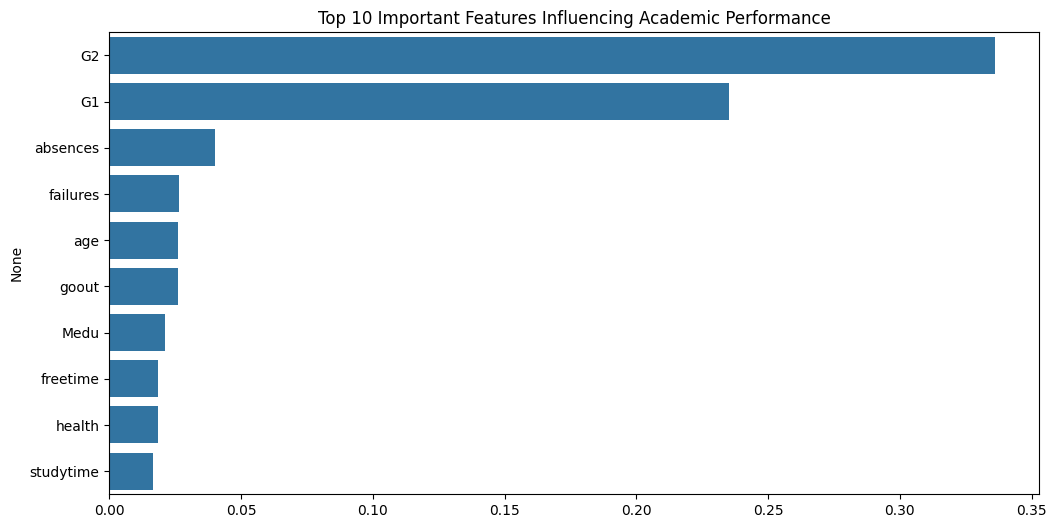

In [16]:
# feature importance

importances = rf_clf.feature_importances_
features = X.columns
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10])
plt.title("Top 10 Important Features Influencing Academic Performance")
plt.show()
